In [5]:
import pandas as pd
import json

# Define a list of file paths to the JSON data
json_file_paths = [
    'Radar Samples - Original.table.json',
    'Radar Samples - Squared.table.json',
    'Radar Samples - Db.table.json',
    'Radar Samples - Normalized.table.json'
]

dataframes = []

for json_file_path in json_file_paths:
    # Load the JSON data from the file
    with open(json_file_path, 'r') as json_file:
        json_data = json.load(json_file)

    data = json_data.get('data', [])
    columns = json_data.get('columns', [])

    df = pd.DataFrame(data, columns=columns)

    dataframes.append(df)



/var/folders/13/__pnhh1j11d7t5c39gxw6j5m0000gn/T/ipykernel_8802/2334530345.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.iloc[start_index:start_index + section_length] = 0
/var/folders/13/__pnhh1j11d7t5c39gxw6j5m0000gn/T/ipykernel_8802/2334530345.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cylinder_data['Sample'] = apply_random_section_dropout(cylinder_data['Sample'])


<Figure size 300x200 with 0 Axes>

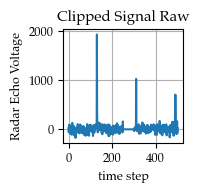

/var/folders/13/__pnhh1j11d7t5c39gxw6j5m0000gn/T/ipykernel_8802/2334530345.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cylinder_data['Sample_db'] = calculate_decibel(cylinder_data['Sample'])


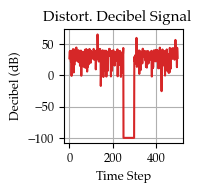

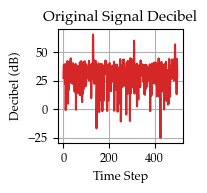

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random

# Adjustments to Matplotlib parameters for better figure appearance
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino']
plt.rcParams['font.size'] = 9

def apply_random_section_dropout(series, section_length=50):
    """
    Zero out a random section of the series.
    
    Parameters:
    - series: Pandas Series to apply dropout to.
    - section_length: Length of the section to set to zero.
    
    Returns:
    - Modified series with a random section zeroed out.
    """
    
    start_index = 250
    series.iloc[start_index:start_index + section_length] = 0
    return series

def apply_random_dropout(series, dropout_points=50):
    """
    Set a random set of points to zero.
    
    Parameters:
    - series: Pandas Series to apply dropout to.
    - dropout_points: Number of random points to set to zero.
    
    Returns:
    - Modified series with random dropout.
    """
    
    indices = random.sample(range(len(series)), dropout_points)
    series.iloc[indices] = 0
    return series

def add_random_peaks(series, num_peaks=1):
    """
    Add random anomaly peaks to a series.

    Parameters:
    - series: Pandas Series to modify.
    - num_peaks: Number of random peaks to add.

    Returns:
    - Modified series with random peaks added.
    """
    for _ in range(num_peaks):
        # Choose a random index in the series
        random_index = np.random.randint(0, len(series))
        # Choose a random peak height between +1000 and +2000
        peak_height = np.random.randint(1000, 2001)
        # Add the peak to the series at the chosen index
        series.iloc[random_index] += peak_height
    return series

def calculate_decibel(sample_series):
    # Square the samples
    sample_squared = np.power(sample_series, 2)
    
    # Add a small constant before converting to decibels to avoid log(0)
    sample_db = 10 * np.log10(sample_squared + 1e-10)
    
    return sample_db

def apply_percentile_saturation(series, low_percentile=10, high_percentile=90):
    """
    Apply percentile saturation to a series.

    Parameters:
    - series: Pandas Series to apply saturation to.
    - low_percentile: The low percentile for saturation.
    - high_percentile: The high percentile for saturation.

    Returns:
    - Modified series with percentile saturation applied.
    """
    low_value = np.percentile(series, low_percentile)
    high_value = np.percentile(series, high_percentile)
    
    series_saturated = np.clip(series, low_value, high_value)
    return series_saturated

def plot_data_by_class(data, title):
    plt.figure(figsize=(3, 2))

    # Filter the data for only the 'cylinder' class
    cylinder_data = data[data['Class'] == 'cylinders']
    
    if not cylinder_data.empty:
        # Apply random section dropout to the 'Sample' column
        
        #cylinder_data['Sample'] = apply_random_section_dropout(cylinder_data['Sample'])
        #cylinder_data['Sample'] = apply_random_dropout(cylinder_data['Sample'])
        
        cylinder_data['Sample'] = apply_random_section_dropout(cylinder_data['Sample'])
        
        # Plot the data for the 'cylinder' class
        plt.figure(figsize=(2, 2))
        sns.set_palette("tab10")  # Apply the Seaborn tab10 color palette
        plt.plot(cylinder_data['Time_step'], cylinder_data['Sample'])

        plt.title("Clipped Signal Raw")
        plt.xlabel('time step')
        plt.ylabel('Radar Echo Voltage')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig("/Users/oscarb/Downloads/raw_occlusion_sat.pdf", format='pdf')
        plt.show()
        
        # Apply the decibel conversion to the modified 'Sample' data
        cylinder_data['Sample_db'] = calculate_decibel(cylinder_data['Sample'])

        # Plotting the decibel signal
        plt.figure(figsize=(2, 2))
        plt.plot(cylinder_data['Time_step'], cylinder_data['Sample_db'], color='tab:red')  # Set color to tab10 red
        plt.title('Distort. Decibel Signal').set_position([0.45, 1.0])  # Adjust the first value as needed to move the title to the left
        
        plt.xlabel('Time Step')
        plt.ylabel('Decibel (dB)')
        #plt.legend()
        plt.grid(True)
        #plt.ylim(-100, 50)
        plt.tight_layout()
        plt.savefig("/Users/oscarb/Downloads/decibel_occlusion_block.pdf", format='pdf')
        plt.show()
        
        data = dataframes[2]
        cylinder_data = data[data['Class'] == 'cylinders']
        # Plotting the decibel signal
        plt.figure(figsize=(2, 2))
        plt.plot(cylinder_data['Time_step'], cylinder_data['Sample'], color='tab:red')  # Set color to tab10 red
        plt.title('Original Signal Decibel')
        plt.xlabel('Time Step')
        plt.ylabel('Decibel (dB)')
        #plt.legend()
        plt.grid(True)
        plt.tight_layout()
        # plt.savefig("title.pdf", format='pdf')
        plt.show()
        
    else:
        print("No data for class 'cylinder'.")

# Example usage with the first DataFrame
# Assuming `dataframes[0]` is the DataFrame you want to plot
plot_data_by_class(dataframes[0], 'Voltage Time Series for Cylinder Class')
